In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns
%matplotlib inline

In [36]:
data = pd.read_csv('reduced_var_data.csv', index_col = 0)
y = data['SalePrice']
x = data.drop(labels = 'SalePrice', axis=1)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [38]:
pipe = Pipeline(steps= [('ss', StandardScaler()), ('clf', SVR(gamma='scale'))])

In [39]:
param_grid = {
    'clf__C':[0.1, 0.5, 1.0, 1.5, 10,100, 150],
    'clf__kernel': ['linear', 'rbf', 'sigmoid', 'poly']
}

search = GridSearchCV(pipe, param_grid, cv=5, iid=False, scoring='neg_mean_absolute_error',
                      return_train_score=False)
search.fit(x, y)          # Here I am using the whole training data
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-19736.160):
{'clf__C': 150, 'clf__kernel': 'linear'}


In [42]:
best_svr = SVR(kernel='linear', gamma ='scale', C = 150)
best_svr.fit(x_train, y_train)
y_pred = best_svr.predict(x_test)
print(mean_absolute_error(y_test, y_pred))

19078.575778036873


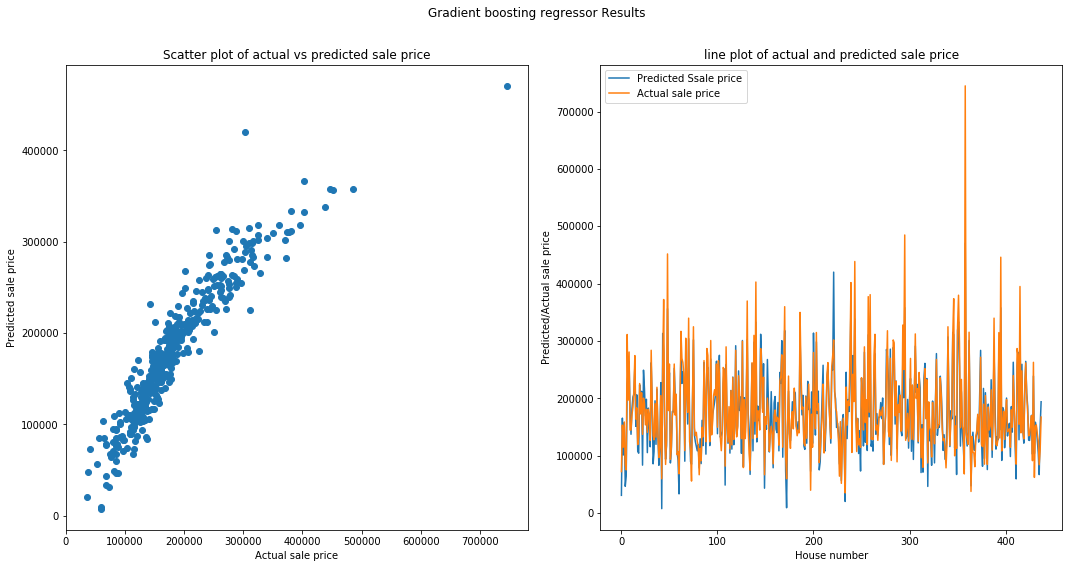

In [44]:
y_pred = best_svr.predict(x_test)
fig = plt.figure(figsize=(15,8))
fig.suptitle('Gradient boosting regressor Results')
plt.subplot(121)
plt.scatter(y_test.values, y_pred)
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.title('Scatter plot of actual vs predicted sale price')
plt.subplot(122)
plt.plot((y_pred), label='Predicted Ssale price')
plt.plot((y_test.values), label='Actual sale price')
plt.xlabel('House number')
plt.ylabel('Predicted/Actual sale price')
plt.title('line plot of actual and predicted sale price')
plt.legend()
plt.tight_layout()
fig.subplots_adjust(top=0.88)